<a href="https://colab.research.google.com/github/GauravKumawat33/Regression/blob/master/Car_Dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
#
%matplotlib inline

In [11]:
df=pd.read_csv("/content/drive/MyDrive/ML/CAR_DEKHO.csv")


In [12]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [13]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [14]:
cdf=df[['year','km_driven','selling_price']]
cdf.head(9)

,year,km_driven,selling_price
0,2007,70000,60000
1,2007,50000,135000
2,2012,100000,600000
3,2017,46000,250000
4,2014,141000,450000
5,2007,125000,140000
6,2016,25000,550000
7,2014,60000,240000
8,2015,25000,850000


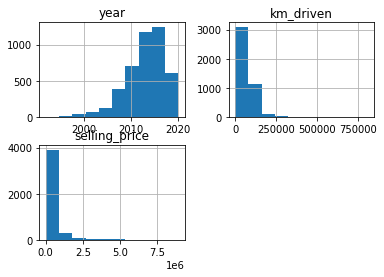

In [17]:
viz=cdf[['year','km_driven','selling_price']]
viz.hist()
#
plt.show()

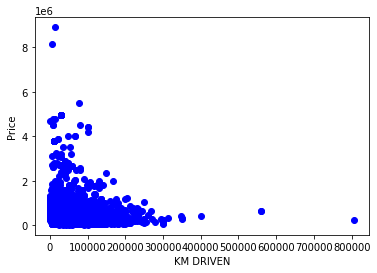

In [20]:
plt.scatter(cdf.km_driven,cdf.selling_price,color='blue')
plt.xlabel("KM DRIVEN")
plt.ylabel("Price")
plt.show()

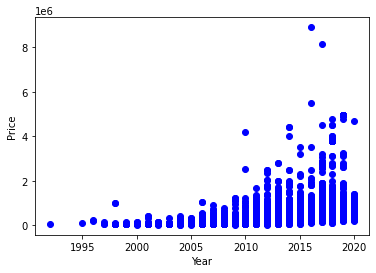

In [21]:
plt.scatter(cdf.year,cdf.selling_price,color='blue')
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [25]:
#
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

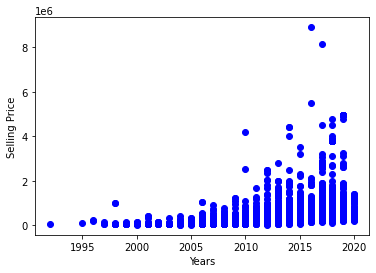

In [26]:
plt.scatter(train.year,train.selling_price,color='blue')
plt.xlabel("Years")
plt.ylabel("Selling Price")
plt.show()

In [39]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
train_X=np.asanyarray(train[['year']])
train_y=np.asanyarray(train[['selling_price']])
regr.fit(train_X,train_y)

print('Coeficients: ',regr.coef_)
print('Intercept: ',regr.intercept_)


Coeficients:  [[55452.93330615]]
Intercept:  [-1.11126071e+08]


Text(0, 0.5, 'Selling Price')

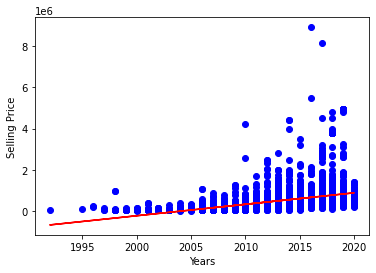

In [40]:
plt.scatter(train.year,train.selling_price,color='blue')
#
plt.plot(train_X,regr.coef_[0][0]*train_X+regr.intercept_[0],'-r')
plt.xlabel("Years")
plt.ylabel("Selling Price")
#

In [35]:
from sklearn.metrics import r2_score
#
test_X=np.asanyarray(test[['year']]);
test_y=np.asanyarray(test[['selling_price']]);
Predicted_test_y=regr.predict(test_X)

print("Mean absolute error: %.2f" % np.mean(np.absolute(Predicted_test_y-test_y)))
print("Residual sum of Squares (MSE) %.2f" % np.mean(np.absolute(Predicted_test_y-test_y)**2))
print("R2-score: %.2f" % r2_score(test_y,Predicted_test_y))


Mean absolute error: 257939.04
Residual sum of Squares (MSE) 240736443867.14
R2-score: 0.22
